In [4]:
#Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.metrics import mean_squared_error
from sklearn.metrics import r2_score
from keras.layers import RNN, SimpleRNNCell
from keras.models import Sequential
from keras.layers import Dense, GRU

In [5]:
# Load the data of company Tesla
df = pd.read_csv("Tesla.csv")
df = df['Open'].values
df = df.reshape(-1, 1)
df.shape
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [6]:
# Load the data company Amazon
df1 = pd.read_csv("Amazon.csv")
df1 = df1['Open'].values
df1 = df1.reshape(-1, 1)
df1.shape
dataset_train = np.array(df1[:int(df1.shape[0]*0.8)])
dataset_test = np.array(df1[int(df1.shape[0]*0.8):])

In [7]:
# Load the data of company Google
df2 = pd.read_csv("Google.csv")
df2 = df2['Open'].values
df2 = df2.reshape(-1, 1)
df2.shape
dataset_train = np.array(df2[:int(df2.shape[0]*0.8)])
dataset_test = np.array(df2[int(df2.shape[0]*0.8):])

In [8]:
df = pd.read_csv("Tesla.csv")
df1 = pd.read_csv("Amazon.csv")
df2 = pd.read_csv("Google.csv")

In [9]:
# Get information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2767 entries, 0 to 2766
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2767 non-null   object 
 1   Open       2767 non-null   float64
 2   High       2767 non-null   float64
 3   Low        2767 non-null   float64
 4   Close      2767 non-null   float64
 5   Adj Close  2767 non-null   float64
 6   Volume     2767 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.4+ KB


In [10]:
# Get the column labels of the dataframe
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
# Get the dimensions of the dataframe
df.shape,df1.shape,df2.shape

((2767, 7), (1761, 7), (1761, 7))

In [12]:
# Print the entire dataframe of Tesla as a string 
print(df.to_string())

            Date         Open         High          Low        Close    Adj Close     Volume
0     2011-01-03     5.368000     5.400000     5.180000     5.324000     5.324000    6415000
1     2011-01-04     5.332000     5.390000     5.204000     5.334000     5.334000    5937000
2     2011-01-05     5.296000     5.380000     5.238000     5.366000     5.366000    7233500
3     2011-01-06     5.366000     5.600000     5.362000     5.576000     5.576000   10306000
4     2011-01-07     5.600000     5.716000     5.580000     5.648000     5.648000   11239500
5     2011-01-10     5.634000     5.736000     5.610000     5.690000     5.690000    6713500
6     2011-01-11     5.718000     5.742000     5.384000     5.392000     5.392000    8551000
7     2011-01-12     5.402000     5.480000     5.304000     5.392000     5.392000    4822000
8     2011-01-13     5.392000     5.394000     5.232000     5.244000     5.244000    3618000
9     2011-01-14     5.230000     5.316000     5.122000     5.150000  

In [13]:
# Print the entire dataframe of Amazon as a string
print(df1.to_string())

            Date         Open         High          Low        Close    Adj Close    Volume
0     2015-01-02   312.579987   314.750000   306.959991   308.519989   308.519989   2783200
1     2015-01-05   307.010010   308.380005   300.850006   302.190002   302.190002   2774200
2     2015-01-06   302.239990   303.000000   292.380005   295.290009   295.290009   3519000
3     2015-01-07   297.500000   301.279999   295.329987   298.420013   298.420013   2640300
4     2015-01-08   300.320007   303.140015   296.109985   300.459991   300.459991   3088400
5     2015-01-09   301.480011   302.869995   296.679993   296.929993   296.929993   2592400
6     2015-01-12   297.559998   298.510010   289.279999   291.410004   291.410004   3421400
7     2015-01-13   297.480011   301.500000   293.230011   294.739990   294.739990   4136400
8     2015-01-14   291.929993   295.910004   286.500000   293.269989   293.269989   5538700
9     2015-01-15   294.000000   296.000000   286.820007   286.950012   286.95001

In [14]:
# Print the entire dataframe of Google as a string
print(df2.to_string())

            Date         Open         High          Low        Close    Adj Close    Volume
0     2015-01-02   527.561584   529.815369   522.665039   523.373108   523.373108   1447563
1     2015-01-05   521.827332   522.894409   511.655243   512.463013   512.463013   2059840
2     2015-01-06   513.589966   514.761719   499.678131   500.585632   500.585632   2899940
3     2015-01-07   505.611847   505.855164   498.281952   499.727997   499.727997   2065054
4     2015-01-08   496.626526   502.101471   489.655640   501.303680   501.303680   3353582
5     2015-01-09   503.377991   503.537537   493.435272   494.811493   494.811493   2071371
6     2015-01-12   493.584869   494.618011   486.225067   491.201416   491.201416   2326771
7     2015-01-13   497.474182   501.602844   491.041840   494.821472   494.821472   2370490
8     2015-01-14   493.295654   501.852173   491.650177   499.498627   499.498627   2235721
9     2015-01-15   504.185760   504.295471   496.397156   500.416107   500.41610

In [15]:
# Display the first rows of the dataframe
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,5.368,5.400,5.180,5.324,5.324,6415000
1,2011-01-04,5.332,5.390,5.204,5.334,5.334,5937000
2,2011-01-05,5.296,5.380,5.238,5.366,5.366,7233500
3,2011-01-06,5.366,5.600,5.362,5.576,5.576,10306000
4,2011-01-07,5.600,5.716,5.580,5.648,5.648,11239500


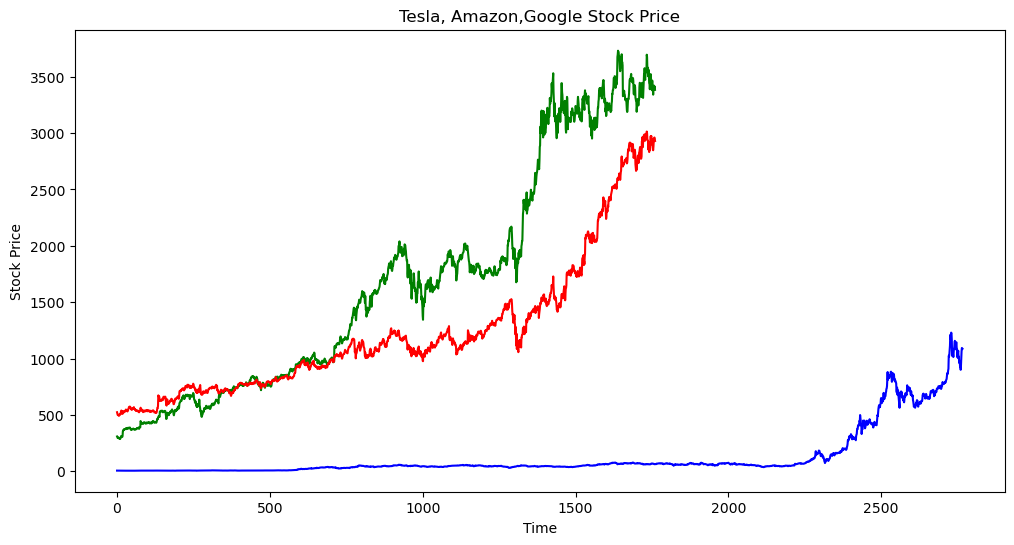

In [17]:
# Plotting graph for stock price of Tesla
plt.figure(figsize=(12,6))
plt.plot(df["Close"],color="blue")
plt.plot(df1["Close"],color="green");
plt.plot(df2["Close"],color="red");
plt.ylabel("Stock Price")
plt.title("Tesla, Amazon,Google Stock Price")
plt.xlabel("Time")
plt.show()

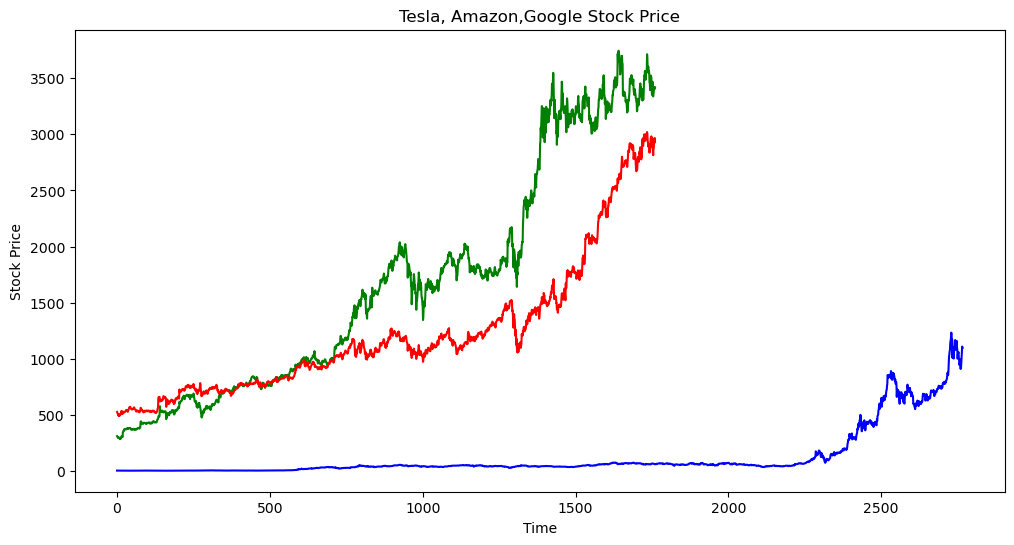

In [18]:
# Plotting graph for stock price of Tesla
plt.figure(figsize=(12,6))
plt.plot(df["Open"],color="blue")
plt.plot(df1["Open"],color="green");
plt.plot(df2["Open"],color="red");
plt.ylabel("Stock Price")
plt.title("Tesla, Amazon,Google Stock Price")
plt.xlabel("Time")
plt.show()

Text(0.5, 1.0, 'TESLA Stock at all time')

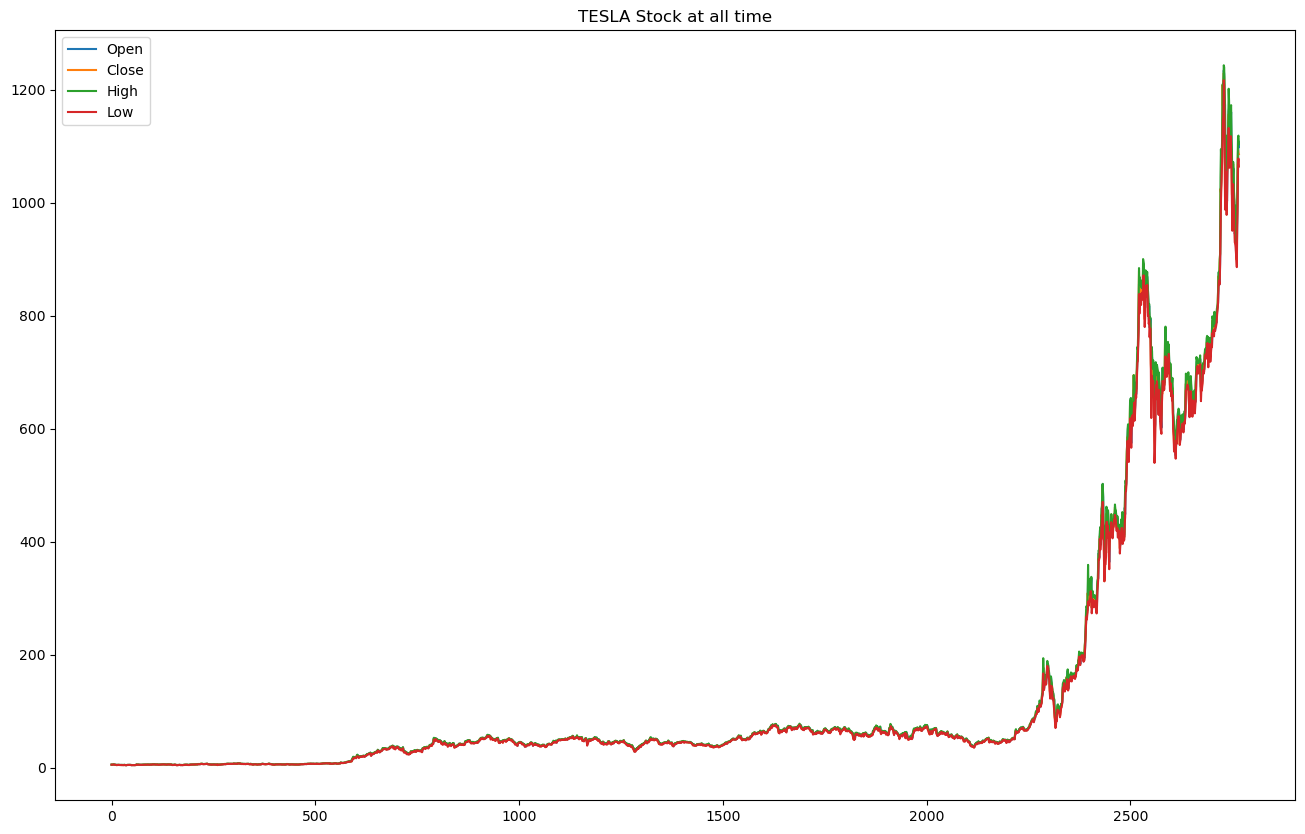

In [18]:
#  plot to TESLA Stock at all time
df[['Open','Close','High','Low']].plot(figsize = (16,10))
plt.title('TESLA Stock at all time')

Text(0.5, 1.0, 'Amazon Stock at all time')

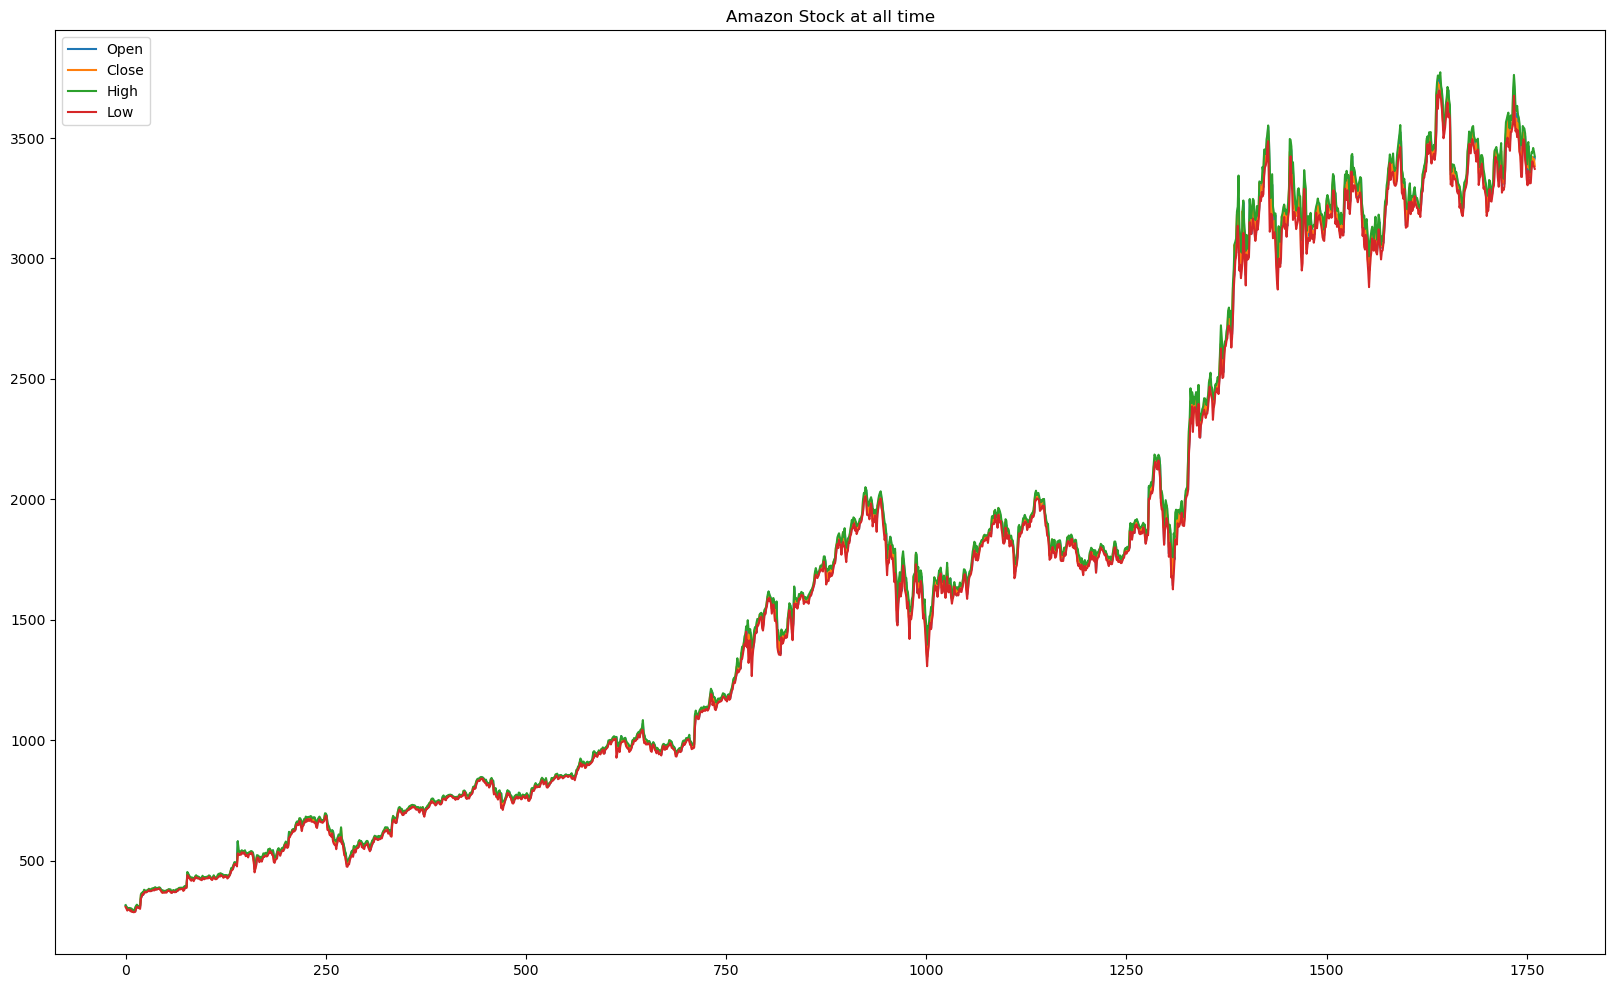

In [19]:
df1[['Open','Close','High','Low']].plot(figsize = (20,12))
plt.title('Amazon Stock at all time')

Text(0.5, 1.0, 'Google Stock at all time')

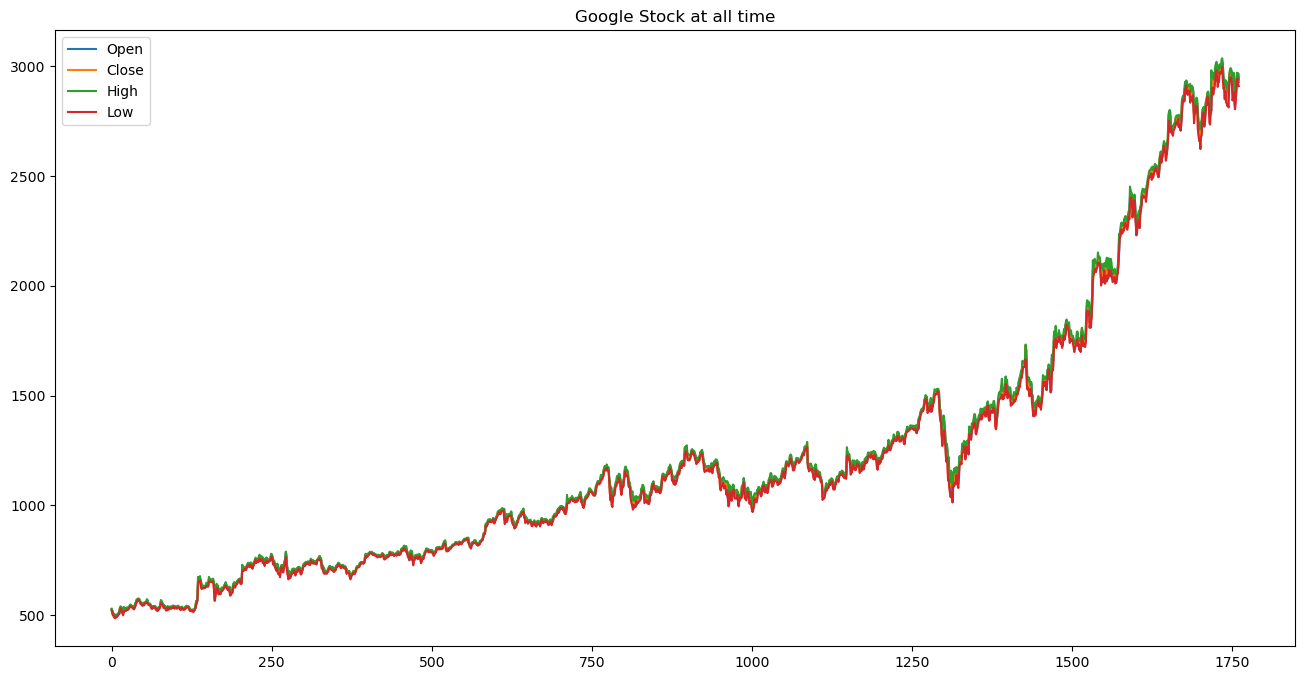

In [20]:
df2[['Open','Close','High','Low']].plot(figsize = (16,8))
plt.title('Google Stock at all time')

In [21]:
# PREDICTION ON TESLA WITH DIFFERENT MODELS

In [22]:
# Scaling the datasets
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

Acc=[]

In [23]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 

In [24]:
# dataset is being created for training and testing a machine learning model
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [25]:
# Create an LSTM model
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [26]:
# Reshape the data for the LSTM network
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [27]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [28]:
# Fit the model to the training data
model.fit(x_train, y_train, epochs=100, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/100
43/43 [==============================] - 12s 122ms/step - loss: 0.0172
Epoch 2/100
43/43 [==============================] - 5s 115ms/step - loss: 0.0038
Epoch 3/100
43/43 [==============================] - 5s 114ms/step - loss: 0.0036
Epoch 4/100
43/43 [==============================] - 6s 129ms/step - loss: 0.0035
Epoch 5/100
43/43 [==============================] - 6s 132ms/step - loss: 0.0028
Epoch 6/100
43/43 [==============================] - 7s 172ms/step - loss: 0.0030
Epoch 7/100
43/43 [==============================] - 7s 172ms/step - loss: 0.0029
Epoch 8/100
43/43 [==============================] - 6s 135ms/step - loss: 0.0028
Epoch 9/100
43/43 [==============================] - 6s 138ms/step - loss: 0.0025
Epoch 10/100
43/43 [==============================] - 6s 140ms/step - loss: 0.0027
Epoch 11/100
43/43 [==============================] - 6s 135ms/step - loss: 0.0022
Epoch 12/100
43/43 [==============================] - 6s 140ms/step - loss: 0.0025
Epoch 13/100

In [29]:
# Make predictions on the test data
y_pred_1 = model.predict(x_test)

10/10 [==============================] - 3s 49ms/step


In [30]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,0.980671,0.967400
1,0.994029,0.972085
2,0.945195,0.985145
3,0.987510,0.959982
4,1.005541,0.978671


In [31]:
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))


Accuracy score of the predictions: 0.3640672607765224


In [32]:
model = load_model('stock_prediction.h5')

10/10 [==============================] - 2s 43ms/step


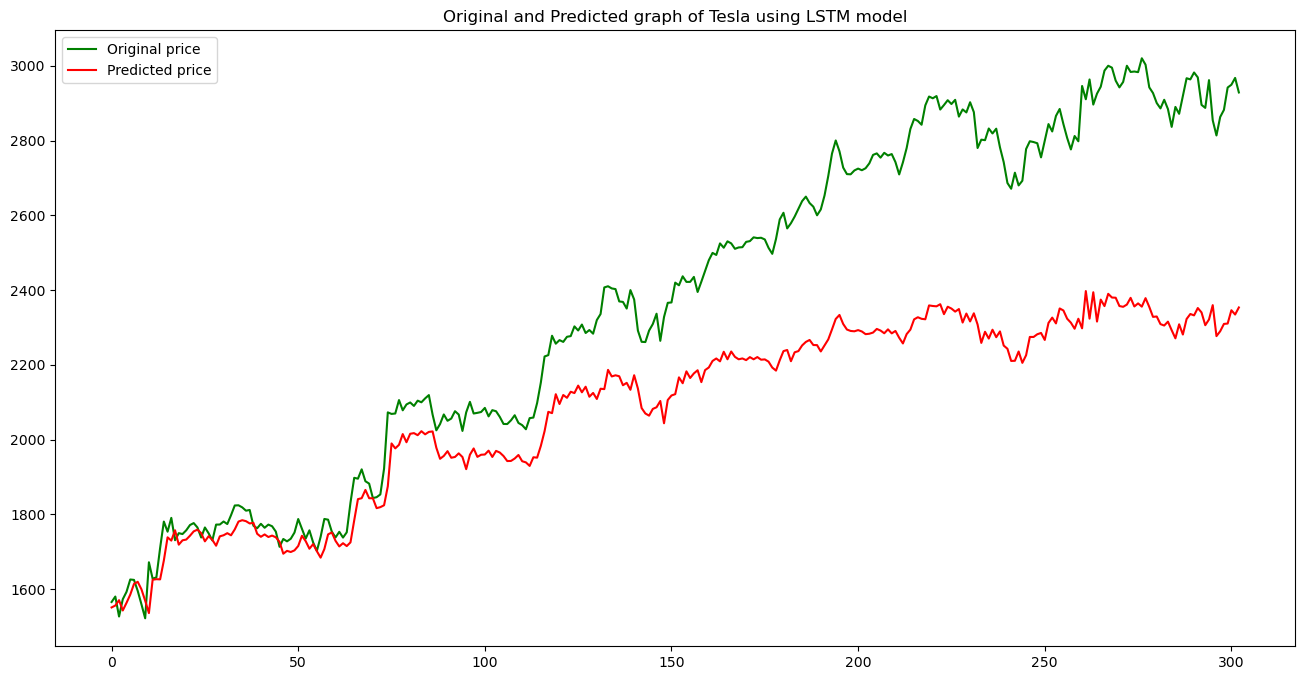

In [33]:
# PLotting the graph of original and predicted price 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#FFFFFF')
ax.plot(y_test_scaled, color='green', label='Original price')
plt.plot(predictions, color='red', label='Predicted price')
plt.title('Original and Predicted graph of Tesla using LSTM model')
plt.legend()

In [34]:
mse = mean_squared_error(y_test_scaled.flatten(), predictions.flatten())

rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 357.82956


In [35]:
# Create an GRU model
model_1 = Sequential()
model_1.add(GRU(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_1.add(Dropout(0.2))
model_1.add(GRU(units=96, return_sequences=True))
model_1.add(Dropout(0.2))
model_1.add(GRU(units=96, return_sequences=True))
model_1.add(Dropout(0.2))
model_1.add(GRU(units=96))
model_1.add(Dropout(0.2))
model_1.add(Dense(units=1))

In [36]:
# Reshape the data for the GRU network
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [37]:
model_1.compile(loss='mean_squared_error', optimizer='adam')

In [38]:
# Fit the model to the training data
model_1.fit(x_train, y_train, epochs=100, batch_size=32)
model_1.save('stock_prediction.h5')

Epoch 1/100
43/43 [==============================] - 14s 132ms/step - loss: 0.0229
Epoch 2/100
43/43 [==============================] - 6s 133ms/step - loss: 0.0031
Epoch 3/100
43/43 [==============================] - 6s 143ms/step - loss: 0.0032
Epoch 4/100
43/43 [==============================] - 6s 140ms/step - loss: 0.0026
Epoch 5/100
43/43 [==============================] - 6s 137ms/step - loss: 0.0022
Epoch 6/100
43/43 [==============================] - 7s 159ms/step - loss: 0.0023
Epoch 7/100
43/43 [==============================] - 6s 138ms/step - loss: 0.0026
Epoch 8/100
43/43 [==============================] - 6s 147ms/step - loss: 0.0021
Epoch 9/100
43/43 [==============================] - 6s 144ms/step - loss: 0.0020
Epoch 10/100
43/43 [==============================] - 6s 137ms/step - loss: 0.0024
Epoch 11/100
43/43 [==============================] - 6s 146ms/step - loss: 0.0019
Epoch 12/100
43/43 [==============================] - 6s 141ms/step - loss: 0.0018
Epoch 13/100

In [39]:
# Make predictions on the test data
y_pred_1 = model_1.predict(x_test)

10/10 [==============================] - 3s 44ms/step


In [40]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,0.980671,0.961177
1,0.994029,0.979668
2,0.945195,0.995948
3,0.987510,0.953051
4,1.005541,0.986542


In [41]:
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))


Accuracy score of the predictions: 0.9864730349599421


In [42]:
model_1 = load_model('stock_prediction.h5')

10/10 [==============================] - 2s 37ms/step


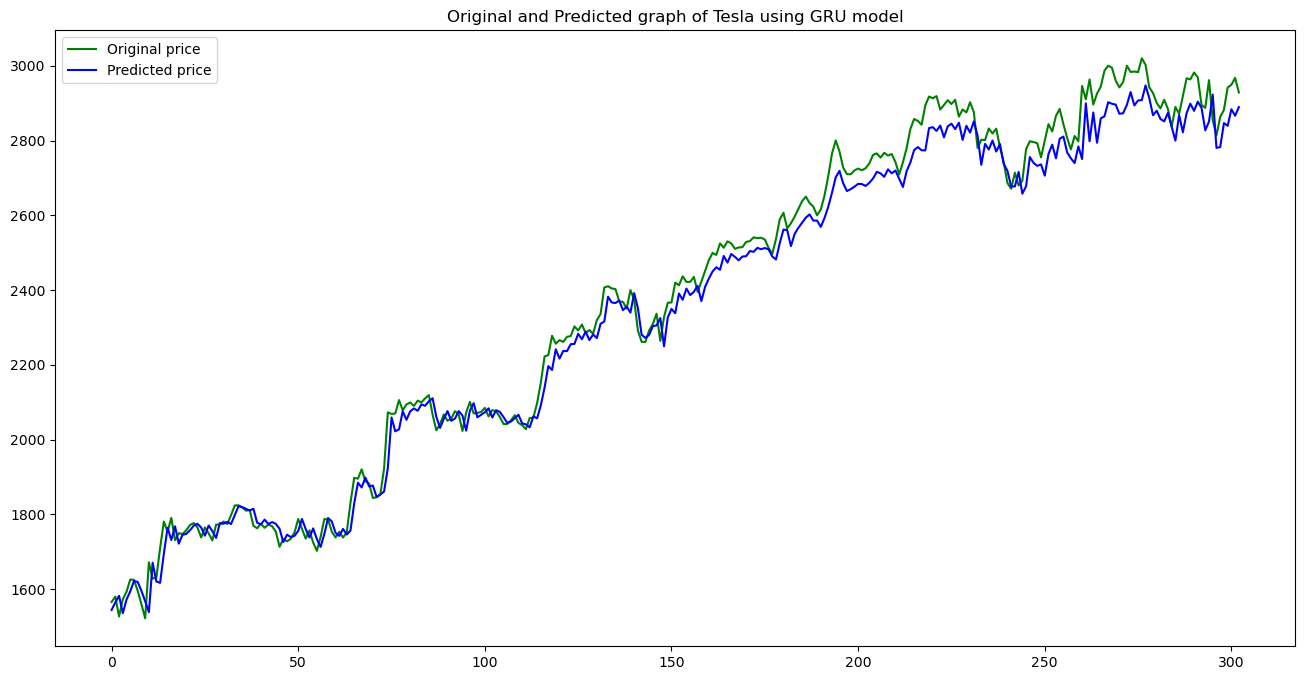

In [43]:
predictions = model_1.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#FFFFFF')
ax.plot(y_test_scaled, color='green', label='Original price')
plt.plot(predictions, color='blue', label='Predicted price')
plt.title('Original and Predicted graph of Tesla using GRU model')
plt.legend()

In [44]:
# Create an SimpleRNN model
model_2 = Sequential()
model_2.add(RNN(cell=SimpleRNNCell(units=96), return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_2.add(Dropout(0.2))
model_2.add(RNN(cell=SimpleRNNCell(units=96), return_sequences=True))
model_2.add(Dropout(0.2))
model_2.add(RNN(cell=SimpleRNNCell(units=96), return_sequences=True))
model_2.add(Dropout(0.2))
model_2.add(RNN(cell=SimpleRNNCell(units=96)))
model_2.add(Dropout(0.2))
model_2.add(Dense(units=1))

In [45]:
# Reshape the data for the SimpleRNN network
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [46]:
model_2.compile(loss='mean_squared_error', optimizer='adam')

In [47]:
# Fit the model to the training data
model_2.fit(x_train, y_train, epochs=100, batch_size=32)
model_2.save('stock_prediction.h5')

Epoch 1/100
43/43 [==============================] - 6s 46ms/step - loss: 0.4323
Epoch 2/100
43/43 [==============================] - 2s 48ms/step - loss: 0.2592
Epoch 3/100
43/43 [==============================] - 2s 49ms/step - loss: 0.1783
Epoch 4/100
43/43 [==============================] - 2s 48ms/step - loss: 0.1698
Epoch 5/100
43/43 [==============================] - 2s 48ms/step - loss: 0.1435
Epoch 6/100
43/43 [==============================] - 2s 49ms/step - loss: 0.1010
Epoch 7/100
43/43 [==============================] - 2s 49ms/step - loss: 0.0830
Epoch 8/100
43/43 [==============================] - 2s 49ms/step - loss: 0.0666
Epoch 9/100
43/43 [==============================] - 2s 50ms/step - loss: 0.0558
Epoch 10/100
43/43 [==============================] - 2s 48ms/step - loss: 0.0496
Epoch 11/100
43/43 [==============================] - 2s 50ms/step - loss: 0.0396
Epoch 12/100
43/43 [==============================] - 2s 48ms/step - loss: 0.0307
Epoch 13/100
43/43 [=====

In [48]:
# Make predictions on the test data
y_pred_1 = model_2.predict(x_test)

10/10 [==============================] - 1s 21ms/step


In [49]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,0.980671,0.964999
1,0.994029,0.957718
2,0.945195,0.972313
3,0.987510,0.952356
4,1.005541,0.953216


In [50]:
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.19243668448379403


In [51]:
model_2 = load_model('stock_prediction.h5')

10/10 [==============================] - 1s 19ms/step


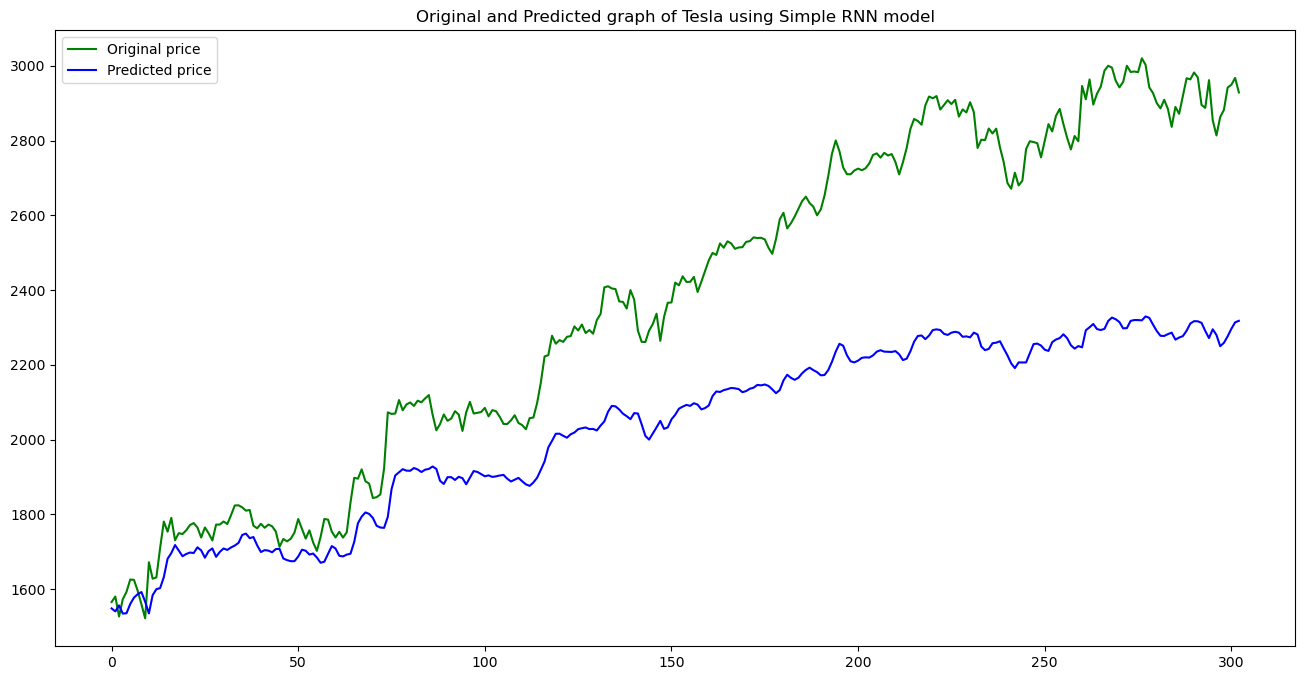

In [52]:
predictions = model_2.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#FFFFFF')
ax.plot(y_test_scaled, color='green', label='Original price')
plt.plot(predictions, color='blue', label='Predicted price')
plt.title('Original and Predicted graph of Tesla using Simple RNN model')
plt.legend()

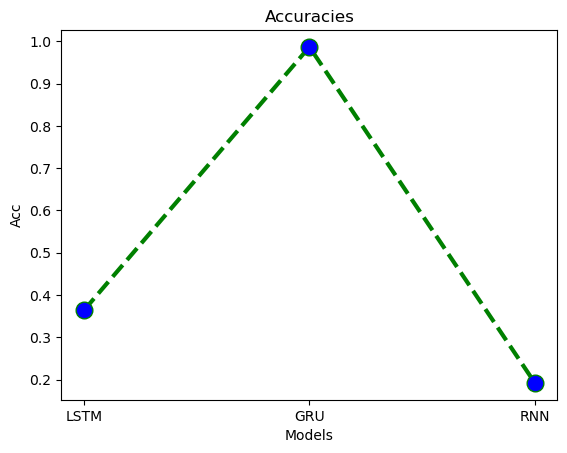

In [53]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['LSTM', 'GRU', 'RNN'])
plt.show()

In [54]:
# PREDICTION ON AMAZON WITH DIFFERENT MODELS

In [55]:
# Scaling the datasets
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

Acc=[]

In [56]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]
def create_dataset(df1):
    x = []
    y = []
    for i in range(50, df1.shape[0]):
        x.append(df1[i-50:i, 0])
        y.append(df1[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 

In [57]:
# dataset is being created for training and testing a machine learning model
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [58]:
# Create an LSTM model
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [59]:
# Reshape the data for the LSTM network
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [60]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [61]:
# Fit the model to the training data
model.fit(x_train, y_train, epochs=100, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/100
43/43 [==============================] - 14s 139ms/step - loss: 0.0230
Epoch 2/100
43/43 [==============================] - 7s 159ms/step - loss: 0.0038
Epoch 3/100
43/43 [==============================] - 7s 160ms/step - loss: 0.0042
Epoch 4/100
43/43 [==============================] - 7s 151ms/step - loss: 0.0032
Epoch 5/100
43/43 [==============================] - 8s 179ms/step - loss: 0.0032
Epoch 6/100
43/43 [==============================] - 7s 170ms/step - loss: 0.0034
Epoch 7/100
43/43 [==============================] - 7s 154ms/step - loss: 0.0027
Epoch 8/100
43/43 [==============================] - 7s 157ms/step - loss: 0.0029
Epoch 9/100
43/43 [==============================] - 6s 147ms/step - loss: 0.0028
Epoch 10/100
43/43 [==============================] - 7s 153ms/step - loss: 0.0032
Epoch 11/100
43/43 [==============================] - 6s 146ms/step - loss: 0.0022
Epoch 12/100
43/43 [==============================] - 7s 152ms/step - loss: 0.0024
Epoch 13/100

In [62]:
# Make predictions on the test data
y_pred_1 = model.predict(x_test)

10/10 [==============================] - 3s 56ms/step


In [63]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,0.980671,0.987966
1,0.994029,0.988815
2,0.945195,1.002375
3,0.987510,0.980829
4,1.005541,0.994307


In [64]:
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.7043000778693567


In [65]:
model = load_model('stock_prediction.h5')

10/10 [==============================] - 2s 48ms/step


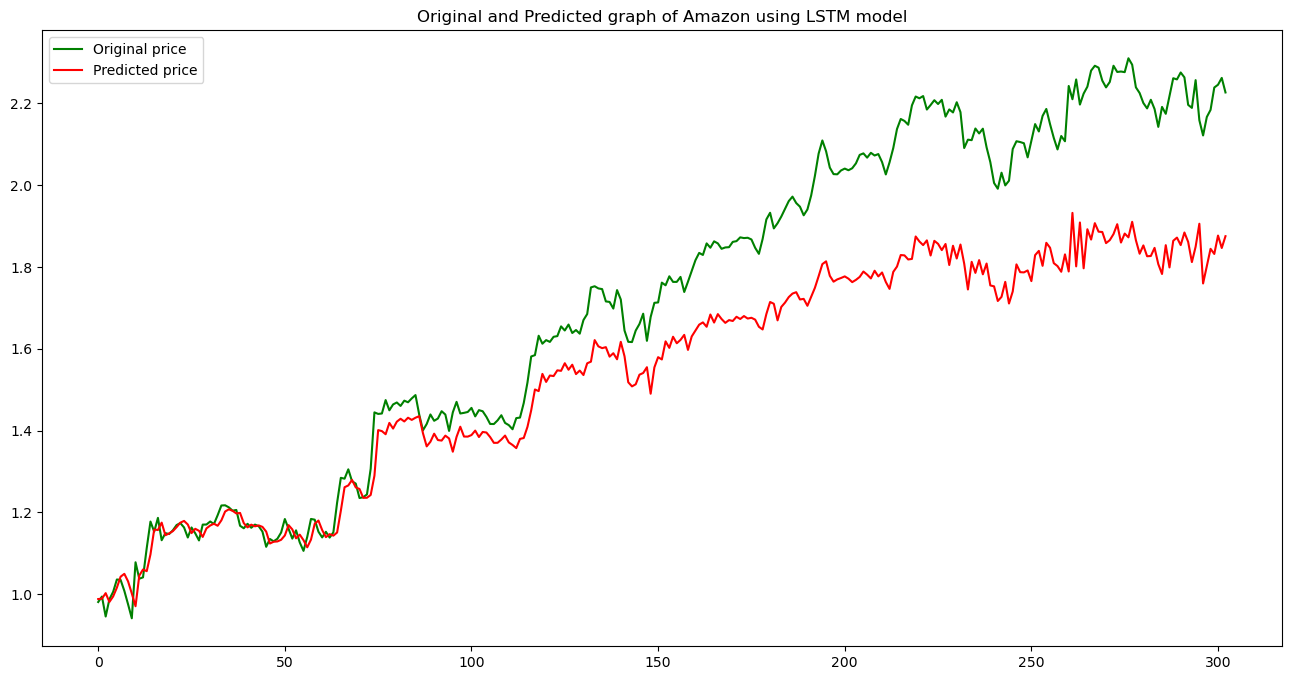

In [66]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#FFFFFF')
ax.plot(y_test_scaled, color='green', label='Original price')
plt.plot(predictions, color='red', label='Predicted price')
plt.title('Original and Predicted graph of Amazon using LSTM model')
plt.legend()

In [67]:
# dataset is being created for training and testing a machine learning model
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [68]:
# Create an GRU model for Amazon
model_1 = Sequential()
model_1.add(GRU(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_1.add(Dropout(0.2))
model_1.add(GRU(units=96, return_sequences=True))
model_1.add(Dropout(0.2))
model_1.add(GRU(units=96, return_sequences=True))
model_1.add(Dropout(0.2))
model_1.add(GRU(units=96))
model_1.add(Dropout(0.2))
model_1.add(Dense(units=1))

In [69]:
# Reshape the data for the GRU network
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [70]:
model_1.compile(loss='mean_squared_error', optimizer='adam')

In [71]:
# Fit the model to the training data
model_1.fit(x_train, y_train, epochs=100, batch_size=32)
model_1.save('stock_prediction.h5')

Epoch 1/100
43/43 [==============================] - 14s 120ms/step - loss: 0.0189
Epoch 2/100
43/43 [==============================] - 6s 130ms/step - loss: 0.0029
Epoch 3/100
43/43 [==============================] - 6s 132ms/step - loss: 0.0029
Epoch 4/100
43/43 [==============================] - 6s 131ms/step - loss: 0.0024
Epoch 5/100
43/43 [==============================] - 6s 139ms/step - loss: 0.0029
Epoch 6/100
43/43 [==============================] - 6s 139ms/step - loss: 0.0028
Epoch 7/100
43/43 [==============================] - 6s 135ms/step - loss: 0.0020
Epoch 8/100
43/43 [==============================] - 6s 141ms/step - loss: 0.0021
Epoch 9/100
43/43 [==============================] - 6s 137ms/step - loss: 0.0020
Epoch 10/100
43/43 [==============================] - 6s 137ms/step - loss: 0.0020
Epoch 11/100
43/43 [==============================] - 6s 139ms/step - loss: 0.0019
Epoch 12/100
43/43 [==============================] - 6s 133ms/step - loss: 0.0018
Epoch 13/100

In [72]:
# Make predictions on the test data
y_pred_1 = model_1.predict(x_test)

10/10 [==============================] - 2s 47ms/step


In [73]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,0.980671,1.010347
1,0.994029,1.025198
2,0.945195,1.042302
3,0.987510,1.002031
4,1.005541,1.029919


In [74]:
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))


Accuracy score of the predictions: 0.9788212393551158


In [75]:
model_1 = load_model('stock_prediction.h5')

10/10 [==============================] - 2s 37ms/step


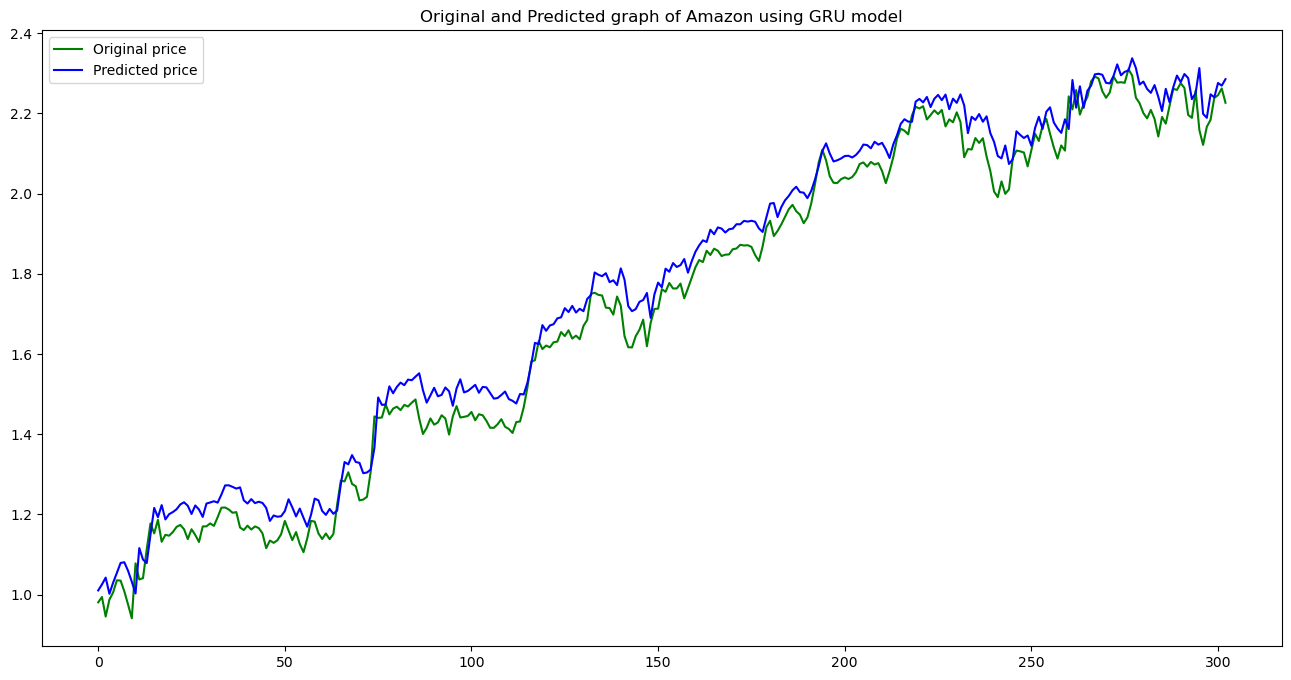

In [76]:
predictions = model_1.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#FFFFFF')
ax.plot(y_test_scaled, color='green', label='Original price')
plt.plot(predictions, color='blue', label='Predicted price')
plt.title('Original and Predicted graph of Amazon using GRU model')
plt.legend()

In [77]:
# dataset is being created for training and testing a machine learning model
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [78]:
# Create an SimpleRNN model
model_2 = Sequential()
model_2.add(RNN(cell=SimpleRNNCell(units=96), return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_2.add(Dropout(0.2))
model_2.add(RNN(cell=SimpleRNNCell(units=96), return_sequences=True))
model_2.add(Dropout(0.2))
model_2.add(RNN(cell=SimpleRNNCell(units=96), return_sequences=True))
model_2.add(Dropout(0.2))
model_2.add(RNN(cell=SimpleRNNCell(units=96)))
model_2.add(Dropout(0.2))
model_2.add(Dense(units=1))

In [79]:
# Reshape the data for the SimpleRNN network
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [80]:
model_2.compile(loss='mean_squared_error', optimizer='adam')

In [81]:
# Fit the model to the training data
model_2.fit(x_train, y_train, epochs=100, batch_size=32)
model_2.save('stock_prediction.h5')

Epoch 1/100
43/43 [==============================] - 7s 47ms/step - loss: 0.4765
Epoch 2/100
43/43 [==============================] - 2s 46ms/step - loss: 0.3223
Epoch 3/100
43/43 [==============================] - 2s 47ms/step - loss: 0.2561
Epoch 4/100
43/43 [==============================] - 2s 47ms/step - loss: 0.2085
Epoch 5/100
43/43 [==============================] - 2s 47ms/step - loss: 0.1635
Epoch 6/100
43/43 [==============================] - 2s 46ms/step - loss: 0.1219
Epoch 7/100
43/43 [==============================] - 2s 48ms/step - loss: 0.1014
Epoch 8/100
43/43 [==============================] - 2s 47ms/step - loss: 0.0813
Epoch 9/100
43/43 [==============================] - 2s 48ms/step - loss: 0.0746
Epoch 10/100
43/43 [==============================] - 2s 49ms/step - loss: 0.0575
Epoch 11/100
43/43 [==============================] - 2s 50ms/step - loss: 0.0495
Epoch 12/100
43/43 [==============================] - 2s 48ms/step - loss: 0.0418
Epoch 13/100
43/43 [=====

In [82]:
# Make predictions on the test data
y_pred_1 = model_2.predict(x_test)

10/10 [==============================] - 1s 18ms/step


In [83]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,0.980671,0.924381
1,0.994029,0.925634
2,0.945195,0.927843
3,0.987510,0.923055
4,1.005541,0.921887


In [84]:
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))


Accuracy score of the predictions: -1.8474551688624006


In [85]:
model_2 = load_model('stock_prediction.h5')

10/10 [==============================] - 1s 15ms/step


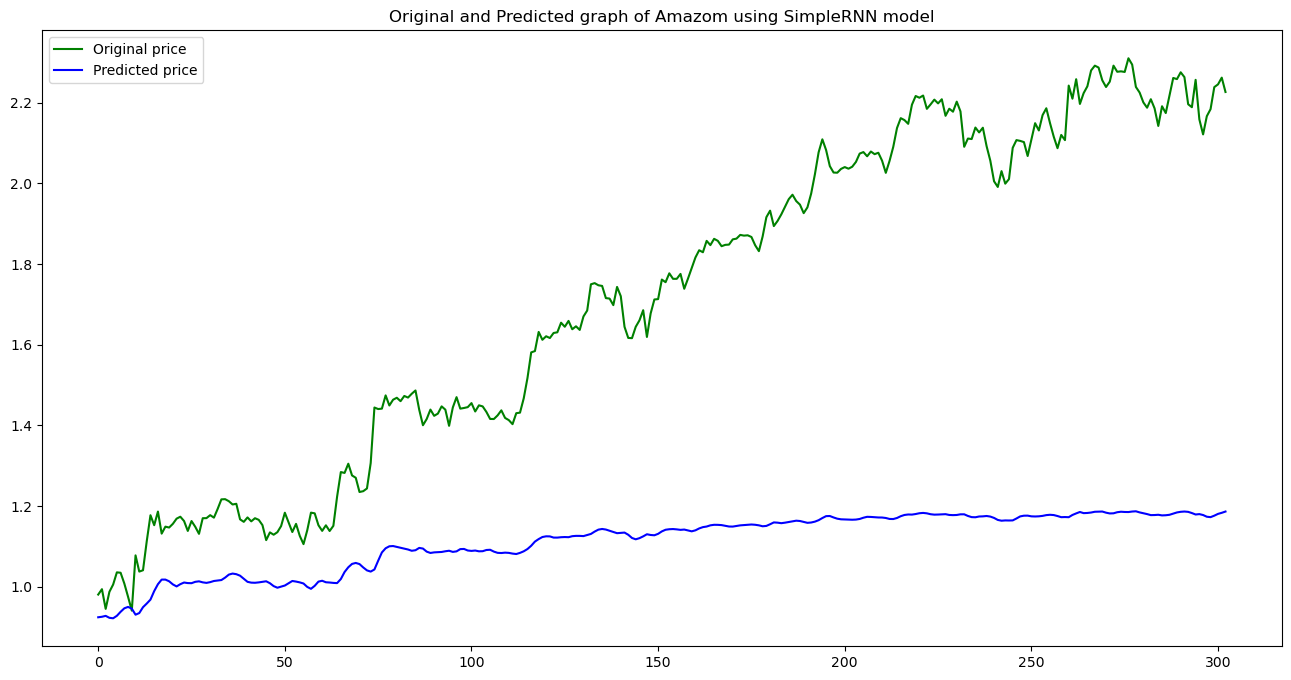

In [86]:
predictions = model_2.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#FFFFFF')
ax.plot(y_test_scaled, color='green', label='Original price')
plt.plot(predictions, color='blue', label='Predicted price')
plt.title('Original and Predicted graph of Amazom using SimpleRNN model')
plt.legend()

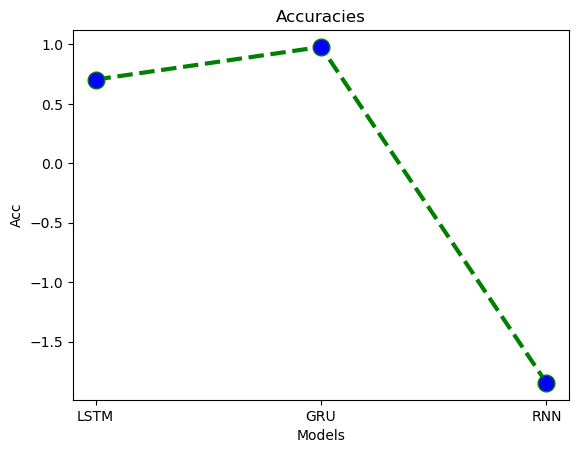

In [87]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['LSTM', 'GRU', 'RNN'])
plt.show()

In [88]:
# PREDICTION ON GOOGLE WITH DIFFERENT MODELS

In [89]:
# Scaling the datasets
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

Acc=[]

In [90]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]
def create_dataset(df2):
    x = []
    y = []
    for i in range(50, df2.shape[0]):
        x.append(df2[i-50:i, 0])
        y.append(df2[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 

In [91]:
# dataset is being created for training and testing a machine learning model
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [92]:
# Create an LSTM model
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [93]:
# Reshape the data for the LSTM network
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [94]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [95]:
# Fit the model to the training data
model.fit(x_train, y_train, epochs=100, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/100
43/43 [==============================] - 15s 156ms/step - loss: 0.0207
Epoch 2/100
43/43 [==============================] - 7s 162ms/step - loss: 0.0038
Epoch 3/100
43/43 [==============================] - 7s 168ms/step - loss: 0.0037
Epoch 4/100
43/43 [==============================] - 8s 194ms/step - loss: 0.0036
Epoch 5/100
43/43 [==============================] - 9s 198ms/step - loss: 0.0045
Epoch 6/100
43/43 [==============================] - 8s 187ms/step - loss: 0.0030
Epoch 7/100
43/43 [==============================] - 8s 179ms/step - loss: 0.0029
Epoch 8/100
43/43 [==============================] - 7s 170ms/step - loss: 0.0034
Epoch 9/100
43/43 [==============================] - 8s 177ms/step - loss: 0.0035
Epoch 10/100
43/43 [==============================] - 7s 171ms/step - loss: 0.0028
Epoch 11/100
43/43 [==============================] - 8s 179ms/step - loss: 0.0025
Epoch 12/100
43/43 [==============================] - 7s 168ms/step - loss: 0.0022
Epoch 13/100

In [96]:
# Make predictions on the test data
y_pred_1 = model.predict(x_test)

10/10 [==============================] - 3s 69ms/step


In [97]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,0.980671,0.962035
1,0.994029,0.963077
2,0.945195,0.975073
3,0.987510,0.951859
4,1.005541,0.966690


In [98]:
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.6549044979873865


In [99]:
model = load_model('stock_prediction.h5')

10/10 [==============================] - 1s 54ms/step


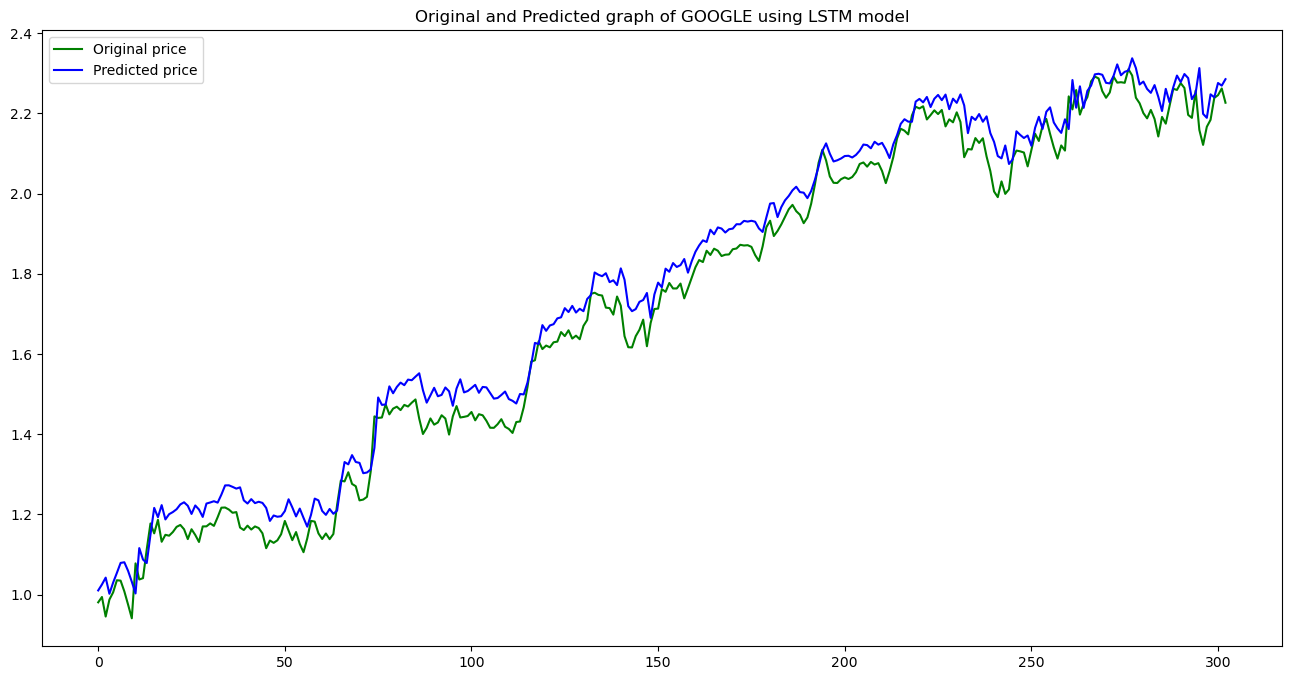

In [100]:
predictions = model_1.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#FFFFFF')
ax.plot(y_test_scaled, color='green', label='Original price')
plt.plot(predictions, color='blue', label='Predicted price')
plt.title('Original and Predicted graph of GOOGLE using LSTM model')
plt.legend()

In [101]:
# dataset is being created for training and testing a machine learning model
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [102]:
# Create an GRU model for GOOGLE
model_1 = Sequential()
model_1.add(GRU(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_1.add(Dropout(0.2))
model_1.add(GRU(units=96, return_sequences=True))
model_1.add(Dropout(0.2))
model_1.add(GRU(units=96, return_sequences=True))
model_1.add(Dropout(0.2))
model_1.add(GRU(units=96))
model_1.add(Dropout(0.2))
model_1.add(Dense(units=1))

In [103]:
# Reshape the data for the GRU network
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [104]:
model_1.compile(loss='mean_squared_error', optimizer='adam')

In [105]:
# Fit the model to the training data
model_1.fit(x_train, y_train, epochs=100, batch_size=32)
model_1.save('stock_prediction.h5')

Epoch 1/100
43/43 [==============================] - 15s 177ms/step - loss: 0.0239
Epoch 2/100
43/43 [==============================] - 8s 184ms/step - loss: 0.0028
Epoch 3/100
43/43 [==============================] - 8s 186ms/step - loss: 0.0027
Epoch 4/100
43/43 [==============================] - 8s 185ms/step - loss: 0.0022
Epoch 5/100
43/43 [==============================] - 8s 194ms/step - loss: 0.0021
Epoch 6/100
43/43 [==============================] - 8s 184ms/step - loss: 0.0019
Epoch 7/100
43/43 [==============================] - 8s 189ms/step - loss: 0.0030
Epoch 8/100
43/43 [==============================] - 8s 183ms/step - loss: 0.0023
Epoch 9/100
43/43 [==============================] - 8s 186ms/step - loss: 0.0023
Epoch 10/100
43/43 [==============================] - 8s 182ms/step - loss: 0.0017
Epoch 11/100
43/43 [==============================] - 8s 183ms/step - loss: 0.0018
Epoch 12/100
43/43 [==============================] - 8s 184ms/step - loss: 0.0018
Epoch 13/100

In [106]:
# Make predictions on the test data
y_pred_1 = model_1.predict(x_test)

10/10 [==============================] - 2s 55ms/step


In [107]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,0.980671,0.914148
1,0.994029,0.928127
2,0.945195,0.944489
3,0.987510,0.908771
4,1.005541,0.933751


In [108]:
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))


Accuracy score of the predictions: 0.8989865584659475


In [109]:
model_1 = load_model('stock_prediction.h5')

10/10 [==============================] - 2s 48ms/step


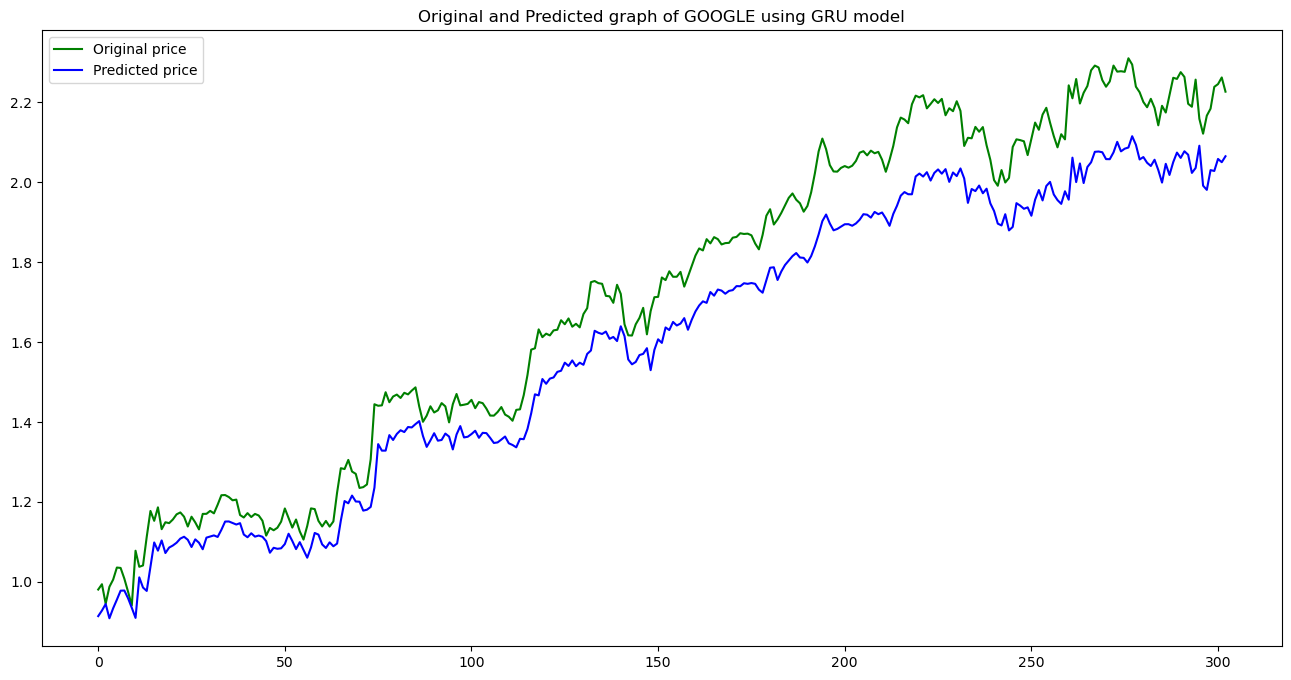

In [110]:
predictions = model_1.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#FFFFFF')
ax.plot(y_test_scaled, color='green', label='Original price')
plt.plot(predictions, color='blue', label='Predicted price')
plt.title('Original and Predicted graph of GOOGLE using GRU model')
plt.legend()

In [111]:
# dataset is being created for training and testing a machine learning model
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [112]:
# Create an SimpleRNN model
model_2 = Sequential()
model_2.add(RNN(cell=SimpleRNNCell(units=96), return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_2.add(Dropout(0.2))
model_2.add(RNN(cell=SimpleRNNCell(units=96), return_sequences=True))
model_2.add(Dropout(0.2))
model_2.add(RNN(cell=SimpleRNNCell(units=96), return_sequences=True))
model_2.add(Dropout(0.2))
model_2.add(RNN(cell=SimpleRNNCell(units=96)))
model_2.add(Dropout(0.2))
model_2.add(Dense(units=1))

In [113]:
# Reshape the data for the SimpleRNN network
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [114]:
model_2.compile(loss='mean_squared_error', optimizer='adam')

In [115]:
# Fit the model to the training data
model_2.fit(x_train, y_train, epochs=100, batch_size=32)
model_2.save('stock_prediction.h5')

Epoch 1/100
43/43 [==============================] - 7s 47ms/step - loss: 0.4465
Epoch 2/100
43/43 [==============================] - 2s 53ms/step - loss: 0.2674
Epoch 3/100
43/43 [==============================] - 2s 53ms/step - loss: 0.1984
Epoch 4/100
43/43 [==============================] - 2s 52ms/step - loss: 0.1588
Epoch 5/100
43/43 [==============================] - 2s 51ms/step - loss: 0.1333
Epoch 6/100
43/43 [==============================] - 2s 55ms/step - loss: 0.1207
Epoch 7/100
43/43 [==============================] - 2s 54ms/step - loss: 0.1027
Epoch 8/100
43/43 [==============================] - 2s 55ms/step - loss: 0.0730
Epoch 9/100
43/43 [==============================] - 2s 56ms/step - loss: 0.0675
Epoch 10/100
43/43 [==============================] - 2s 55ms/step - loss: 0.0583
Epoch 11/100
43/43 [==============================] - 2s 54ms/step - loss: 0.0478
Epoch 12/100
43/43 [==============================] - 3s 61ms/step - loss: 0.0425
Epoch 13/100
43/43 [=====

In [116]:
# Make predictions on the test data
y_pred_1 = model_2.predict(x_test)

10/10 [==============================] - 1s 19ms/step


In [117]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,0.980671,0.928707
1,0.994029,0.930421
2,0.945195,0.930863
3,0.987510,0.928886
4,1.005541,0.928456


In [118]:
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))


Accuracy score of the predictions: -3.280280828417844


In [119]:
model_2 = load_model('stock_prediction.h5')

10/10 [==============================] - 1s 21ms/step


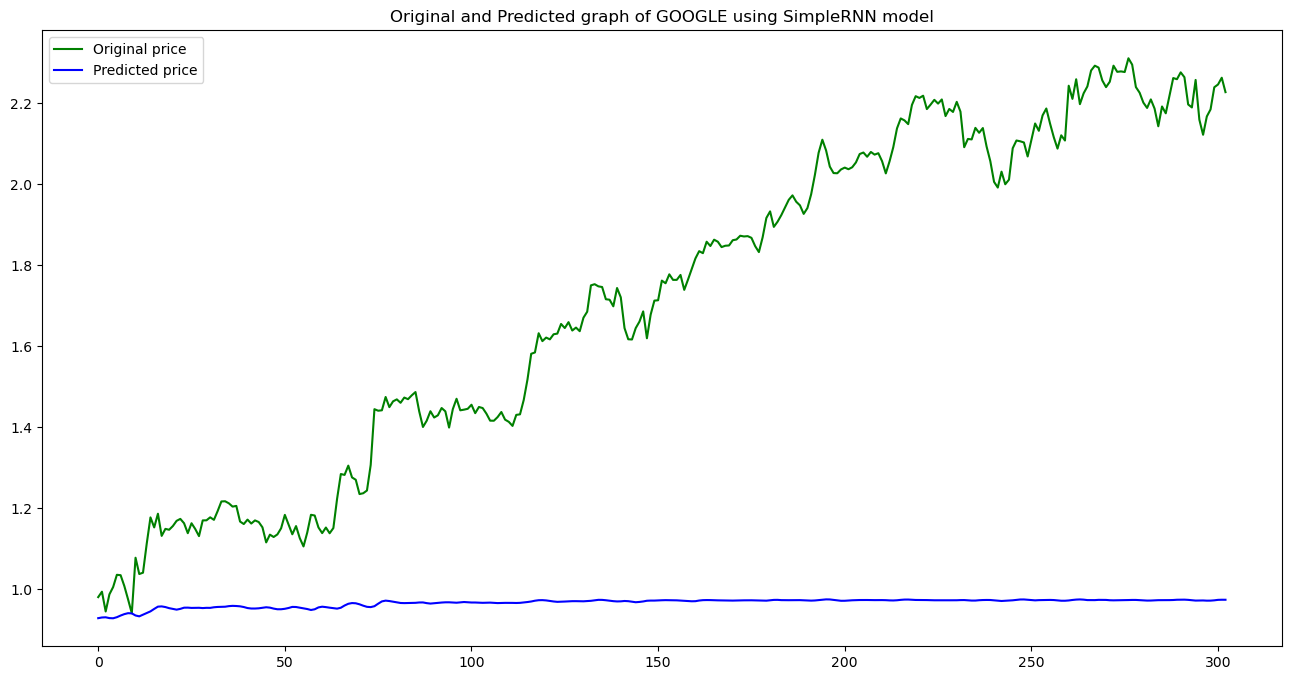

In [120]:
predictions = model_2.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#FFFFFF')
ax.plot(y_test_scaled, color='green', label='Original price')
plt.plot(predictions, color='blue', label='Predicted price')
plt.title('Original and Predicted graph of GOOGLE using SimpleRNN model')
plt.legend()

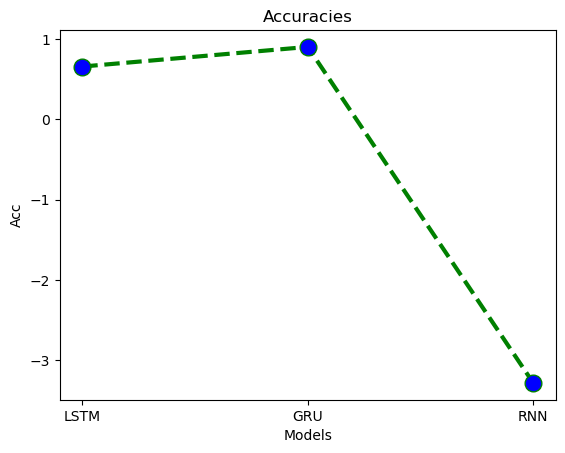

In [121]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['LSTM', 'GRU', 'RNN'])
plt.show()